In [70]:
# Blend Image formula = alpha * pixel_1 + beta * pixel_2 + gamma

In [71]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
img1 = cv2.imread('../Images/dog_backpack.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('../Images/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

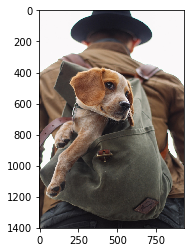

In [73]:
plt.imshow(img1)

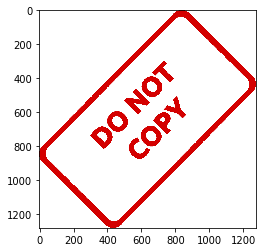

In [74]:
plt.imshow(img2)

In [75]:
img1.shape

(1401, 934, 3)

In [76]:
img2.shape

(1280, 1277, 3)

# blending images of same size

In [77]:
img1 = cv2.resize(img1, (1200, 1200))
img2 = cv2.resize(img2, (1200, 1200))

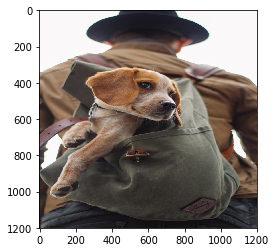

In [78]:
plt.imshow(img1)

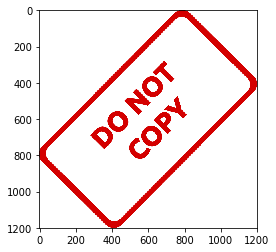

In [79]:
plt.imshow(img2)

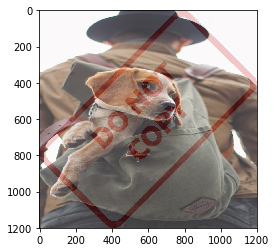

In [80]:
blended = cv2.addWeighted(src1=img1, alpha=0.8, src2=img2, beta=0.2, gamma=0)
plt.imshow(blended)

# Overlay small image on top of larger image(No blending)

In [81]:
img1 = cv2.imread('../Images/dog_backpack.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('../Images/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

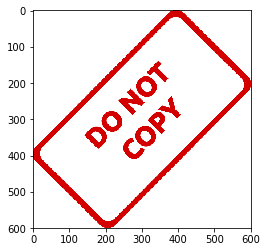

In [82]:
img2 = cv2.resize(img2, (600, 600))
plt.imshow(img2)

In [83]:
large_img = img1
small_img = img2

In [84]:
x_offset = 0
y_offset = 0

In [85]:
x_end = x_offset + small_img.shape[1] # as shape is stored as (y, x) tat is row, col
y_end = y_offset + small_img.shape[0]

In [86]:
large_img[y_offset : y_end, x_offset : x_end] = small_img

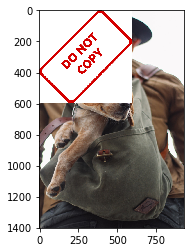

In [87]:
plt.imshow(large_img)

# blending together images of different size

In [88]:
img1 = cv2.imread('../Images/dog_backpack.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('../Images/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [89]:
img2 = cv2.resize(img2, (600, 600))

In [90]:
img1.shape

(1401, 934, 3)

In [91]:
x_offset = img1.shape[1] - img2.shape[1] # 934 - 600
y_offset = img1.shape[0] - img2.shape[1] # 1401 - 600

In [92]:
rows, cols, channels = img2.shape

In [93]:
roi = img1[y_offset:1401, x_offset:943] # roi --> region of intrest

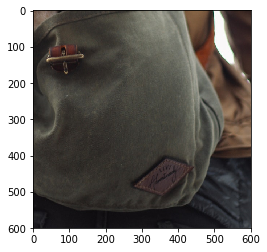

In [94]:
plt.imshow(roi)

In [95]:
img2gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

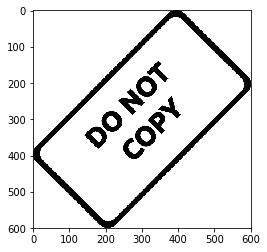

In [96]:
plt.imshow(img2gray, cmap='gray')

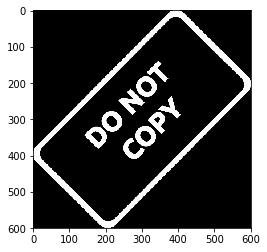

In [97]:
mask_inv = cv2.bitwise_not(img2gray)
plt.imshow(mask_inv, cmap='gray')

In [98]:
mask_inv.shape

(600, 600)

In [99]:
import numpy as np

In [100]:
white_background = np.full(img2.shape, 255, dtype=np.uint8)

In [101]:
white_background

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [102]:
bg = cv2.bitwise_or(src1=white_background, src2=white_background, mask=mask_inv)

In [103]:
bg.shape

(600, 600, 3)

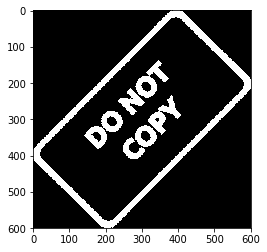

In [104]:
plt.imshow(bg)

In [105]:
fg = cv2.bitwise_or(img2, img2, mask=mask_inv)

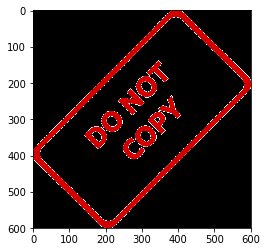

In [106]:
plt.imshow(fg)

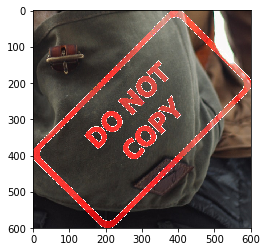

In [107]:
final_roi = cv2.bitwise_or(roi, fg)
plt.imshow(final_roi)

In [108]:
large_img = img1
small_img = final_roi

In [109]:
large_img[y_offset:y_offset+small_img.shape[0], x_offset:x_offset+small_img.shape[1]] = small_img

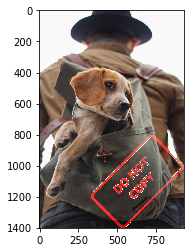

In [110]:
plt.imshow(large_img)